# Review

## Double integral and triple integal

* `I, e = dblquad(f, a, b, l, u)` evaluates $$\int_a^b\int_{\ell(x)}^{u(x)}f(y, x)dydx$$
  * $f(y, x)$ is the integrand, the first argument is the dummy variable fo the inner integral
  * $\ell$ and $u$ can be constants, or functions of $x$
 
* `I, e = tplquad(f, a, b, l, u, q, r)` evaluates $$\int_a^b\int_{\ell(x)}^{u(x)}\int_{q(x,y)}^{r(x,y)}f(z, y, x)dzdydx$$
  * $f(z, y, x)$ is the integrand, the first argument is the dummy variable fo the inner integral
  * $\ell$ and $u$ can be constants, or functions of $x$
  * $q$ adn $r$ can be constants of functions of $(x,y)$, dummy variable of the outermost integral first.
 

# Multiple integral in general

How to evaluate 
$$\int_{\ell_n}^{u_n}\int_{\ell_{n-1}}^{u_{n-1}}\cdots\int_{\ell_0}^{u_0}f(x_0,x_1,\cdots,x_n)dx_0dx_1\cdots dx_n$$

The `scipy.integrate` package provides an `nquad` function to compute n-integrals
* `I, e=nquad(f, bounds)` calculates the above integral
  * $f(x_0, x_1,\dots, x_n)$ is an $n$-variable function
    * $x_0$ is the dummy variable of the innermost integral
  * `bounds` is a list of bounds, each bound is
    * either a list of two float numbers, the lower and upper limits
    * or a function that returns a list containing the lower and upper limits
      * The function takes all the available bounds, in the order from inner to outer dummy variables.
    * the list is also ordered from the inner to outer dummy variables
  * it returns the approximated integral with an error estimate

## Reverse order
Note that the variable order fo the bounds, and the order of the bounds** are the opposite of `dblquad`and `tplquad`


# Example

Let $X=(X_1, X_2, X_3)$ be a multivariate normal distribution with mean $0$ and the variance-covariance matrix
$$
\Sigma = \left[\begin{array}{c}
1 & -1 & 0\\
-1 & 2 & 1\\
0 & 1 & 3
\end{array}\right]
$$

**Multivariance normal**
The probability density function is 
$$
f(\vec x) = \frac{1}{\sqrt{(2\pi)^3|\Sigma|}}e^{-\frac{1}{2}\vec x^T\Sigma^{-1}\vec x}
$$

**Probability**:
$$P(X\in E) = \int\int\int_E f(x_1,x_2,x_3)dx_1dx_1dx_2$$

Let $E$ be the ellipsoid which, under the coordinate system 
$$
\left[\begin{array}{c}
\frac{1}{\sqrt3}\\
\frac{1}{\sqrt3}\\
\frac{1}{\sqrt3}
\end{array}\right],\;
\left[\begin{array}{c}
\frac{1}{\sqrt2}\\
-\frac{1}{\sqrt2}\\
0
\end{array}\right],\;
\left[\begin{array}{c}
\frac{1}{\sqrt6}\\
\frac{1}{\sqrt6}\\
-\frac{2}{\sqrt{6}}
\end{array}\right]
$$
has the form $$u^2+\frac{v^2}{4}+\frac{w^2}{9}\leq 1$$.

What is the probability that it false into $E$?

**variable change**:
Under the coordinate system
$$
\left[\begin{array}{c}
\frac{1}{\sqrt3}\\
\frac{1}{\sqrt3}\\
\frac{1}{\sqrt3}
\end{array}\right],\;
\left[\begin{array}{c}
\frac{2}{\sqrt2}\\
-\frac{2}{\sqrt2}\\
0
\end{array}\right],\;
\left[\begin{array}{c}
\frac{3}{\sqrt6}\\
\frac{3}{\sqrt6}\\
-\frac{6}{\sqrt{6}}
\end{array}\right]
$$
$E$ is the unit sphere.

$$
\left[\begin{array}{c}
x\\y\\z
\end{array}\right] =
J
\left[\begin{array}{c}
\alpha\\\beta\\\gamma
\end{array}\right],\;\text{ where }
J = \left[\begin{array}{c}
\frac{1}{\sqrt3} & \frac{2}{\sqrt2} & \frac{3}{\sqrt6}\\
\frac{1}{\sqrt3} & -\frac{2}{\sqrt2}& \frac{3}{\sqrt6}\\
\frac{1}{\sqrt3} & 0 & -\frac{6}{\sqrt6}
\end{array}\right]
$$
Then, $\alpha^2+\beta^2+\gamma^2\leq 1$

We use the polar coordinate 
$$\alpha = r\sin\phi\cos\theta,\;\beta=r\sin\phi\sin\theta,\;\gamma=r\cos\phi,\;
\theta\in[0,2\pi],\;\phi\in[0,\pi]$$
and $$d\alpha d\beta d\gamma = r^2\sin\phi$$
In addition, $$dxdydz=|J|d\alpha d\beta d\gamma$$

Then
$$P(X\in E) = \int_0^{2\pi}\int_0^\pi\int_0^1 f(\vec x(r,\phi,\theta))|J|r^2\sin\phi drd\phi d\theta$$

In [1]:
from numpy import array, sqrt, matmul, sin, cos, exp
from numpy.linalg import det, inv
from scipy.integrate import tplquad, nquad
from math import pi

J = array([[1/sqrt(3), sqrt(2), sqrt(3/2)], 
           [1/sqrt(3), -sqrt(2), sqrt(3/2)],
           [1/sqrt(3), 0, -sqrt(6)]])
DJ = det(J)

S = array([[1, -1, 0], [-1, 2, 1], [0, 1, 3]])
DS = det(S)
S_inv = inv(S)

#alpha, beta gamma
abg = lambda r, phi, theta: array([r*sin(phi)*cos(theta), 
                                   r*sin(phi)*sin(theta),
                                   r*cos(phi)])
xyz = lambda abg: matmul(J, abg)

# pdf
f = lambda x: 1/sqrt((2*pi)**3*DS)*exp(-matmul(x.T, matmul(S_inv, x))/2)

P = tplquad(lambda r, phi, theta: f(xyz(abg(r, phi, theta)))*DJ*r**2*sin(phi), 
           0, 2*pi, 0, pi, 0, 1)

print(P)

# please note the order of the limits are the opposite of those in tplquad
P = nquad(lambda r, phi, theta: f(xyz(abg(r, phi, theta)))*DJ*r**2*sin(phi), 
           [(0, 1), (0, pi), (0, 2*pi)])

print(P)

(0.34021989613857845, 1.419628212553925e-08)
(0.34021989613857845, 1.419628212553925e-08)


# Example
A wheel with a profile $y^2=(x^4+1)(4-x^2)$ (in the unit of centimeter) is rolling down a inclined slope with an angle $\pi/6$ to the ground. The wheel traveled a distance of 1 meter from a resting position. What is its final speed?


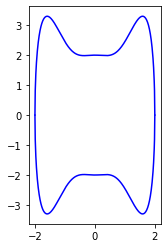

In [4]:
from matplotlib.pyplot import plot, subplots
from numpy import linspace, sqrt

x = linspace(-2, 2, 401)
f = lambda x: sqrt((x**4+1)*(4-x**2))

fig, ax = subplots()
ax.set_aspect(1)
plot(x, f(x), '-b', x, -f(x), '-b')

Note that $-2\leq x\leq2$

## Radius
We first need to know its largest radius $R$, which is the maximum of $y(x)$. 
* We need to compute the critical point.
* We use symbolic calculation to derive the critical number

In [15]:
from sympy import symbols, solve, diff
from numpy import array
x, y = symbols("x, y", real=True)
F = y**2-(x**4+1)*(4-x**2)
Y = solve(F, y)[0]
dy = diff(Y, x)
display(dy)

roots = array([float(r) for r in solve(dy, x)])
R = max(f(roots))
print(R)

-(-3*x**5 + 8*x**3 - x)/sqrt(-x**6 + 4*x**4 - x**2 + 4)

3.2983965417673935


## Mass

$$m = \int\int\int_Vdzdydx$$

We use cylindrical coordiantes (i.e., polar coordinates for $y$ and $z$)

$$ y=r\cos\theta,\;z=r\sin\theta,\;\theta\in[0,2\pi]$$
and
$$dzdydx = rd\theta drdx$$

$$M = \int_{-2}^2\int_{0}^{f(x)}\int_0^{2\pi}rd\theta drdx$$

## Moment of inertia about the $x$-axis
$$I_x = \int\int\int_V(y^2+z^2)dzdydx$$

Using cylindrical coordiantes, $y^2+z^2 = r^2$, 
$$I_x = \int_{-2}^2\int_{0}^{f(x)}\int_0^{2\pi}(r^2)(r)d\theta drdx=\int_{-2}^2\int_{0}^{f(x)}\int_0^{2\pi}r^3drd\theta drdx$$


In [22]:
from math import pi
from scipy.integrate import nquad

# mass
m = nquad(lambda theta, r, x:r, [[0, 2*pi], lambda x: [0, f(x)], [-2, 2]])[0]

# moment of inertia
Ix = nquad(lambda theta, r, x:r**3, [[0, 2*pi], lambda x: [0, f(x)], [-2, 2]])[0]
print("m=", m, "Ix=", Ix)


m= 79.46733417080468 Ix= 295.2925525544839


## Rolling motion
Let $a(t)$ be the acceleration of the wheel at time $t$, and $\phi$ be its angular acceleration. Then, $$a=R\phi$$

**the component of gravity pointing down hill**: $\displaystyle G=mg\sin\frac\pi6$

**the component of gravity orthogonal to the slope**: $\displaystyle mg\cos\frac\pi6$

**the friction**: $F$

**friction causes rolling**:
$$I_x\phi = RF$$

**Newton's second law of motion**:
$$ma = G - F$$
Note that $F$ is a linear function of $\phi$, which is a linear function of $a$. So this defines a linear equation for teh acceleration $a$

In [23]:
from sympy import sin, cos, Eq
from scipy.constants import g
from sympy.abc import a, F, G, phi
t = symbols("t", positive=True)

G = m*g*sin(pi/6)

# F as a function of a
F = solve(Eq(Ix*phi,R*F), F)[0].subs({phi:a/R})

a = solve(Eq(m*a, G-F), a)[0]
print("a=", a)


a= 3.65496179742198


In [24]:
from sympy import integrate,lambdify

# velocity
v = integrate(a, (t, 0, t))

# position
x = integrate(v, (t, 0, t))

# at what time had it traveled 1 m=100cm?
T = solve(Eq(x, 100), t)[0]
print("T=", T, "s")

vt = lambdify("t", v)

print("terminal velocity=", vt(T), "cm/s")

T= 7.39730587349881 s
terminal velocity= 27.0368703714834 cm/s
